In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_path = 'V:/sample_annotation/images/seaview_000047.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_flip = img[:,::-1]
height, width, color = img.shape

In [2]:
# https://stackoverflow.com/questions/56115874/how-to-convert-bounding-box-x1-y1-x2-y2-to-yolo-style-x-y-w-h
def yolobbox2bbox(x,y,w,h):
    x1, y1 = round(x-w/2), round(y-h/2)
    x2, y2 = round(x+w/2), round(y+h/2)
    return x1, y1, x2, y2

In [3]:
ann_path = 'V:\sample_annotation\label\seaview_000047x.txt'
with open(ann_path, 'r') as txt:
    txt = txt.read().splitlines()

In [4]:
for line in txt:
    cl, x, y, w, h = [float(i) for i in line.split(' ')]

In [5]:
def plotflip(x1, y1, x2, y2, x1f, x2f):
    cv2.rectangle(img_with_bbox, (x1, y1), (x2, y2), (255, 0, 0), 1)
    cv2.rectangle(img_flip_with_bbox, (x1f, y1), (x2f, y2), (255, 0, 0), 1)
    return img_with_bbox, img_flip_with_bbox

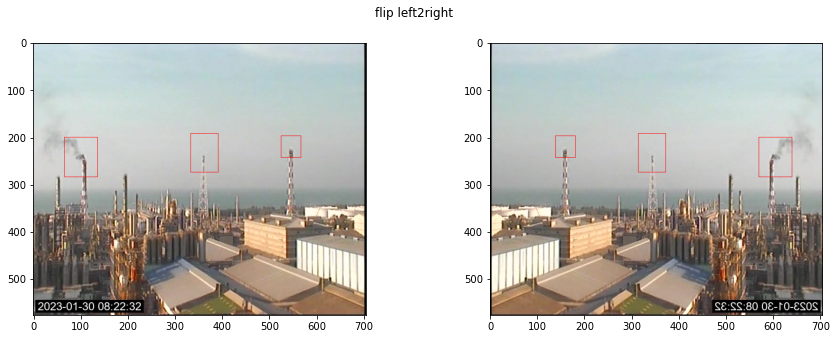

In [6]:
img_with_bbox = img.copy()
img_flip_with_bbox = img_flip.copy()
for line in txt:
    cl, x, y, w, h = [float(i) for i in line.split(' ')]
    x = round(x*width)
    y = round(y*height)
    w = round(w*width)
    h = round(h*height)
    x1, y1, x2, y2 = yolobbox2bbox(x,y,w,h)
    x1f, x2f = width-x1, width-x2

    img_with_bbox, img_flip_with_bbox = plotflip(x1, y1, x2, y2, x1f, x2f)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('flip left2right')
ax1.imshow(img_with_bbox)
ax2.imshow(img_flip_with_bbox)
    # print(x, y, w, h)